In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Load/Read dataset
# Two datasets are there so we are taking headers(name of column) for a single time

df = pd.read_csv("/content/Algerian_forest_fires_dataset_UPDATE.csv", header = 1)

In [ ]:
#checking dataset
df.head()


day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

In [ ]:
df.describe()


day month  year Temperature   RH   Ws Rain   FFMC  DMC   DC  ISI  BUI  \
count   246   245   245         245  245  245   245   245  245  245  245  245   
unique   33     5     2          20   63   19    40   174  167  199  107  175   
top      01    07  2012          35   64   14     0  88.9  7.9    8  1.1    3   
freq      8    62   244          29   10   43   133     8    5    5    8    5   

        FWI Classes    
count   245       244  
unique  128         9  
top     0.4   fire     
freq     12       131

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# ***Data Cleaning***

In [ ]:
# Check missing values
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [ ]:
# checking rows which are showing null values
# one row is containing region name Siddi Bel-Abbes the northwest region of the Algeria ( So this row will not consider)
df[df.isnull().any(axis=1)]

day month  year Temperature   RH   Ws Rain   \
122  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN   NaN   
167                             14    07  2012          37   37   18   0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes    
122   NaN   NaN     NaN   NaN   NaN      NaN       NaN  
167  88.9  12.9  14.6 9  12.5  10.4  fire          NaN

The dataset is converted into two sets based on region from 122th inex, we can make a new column based on a region.

1. Bejaia Region Dataset
2. Sidi-Bel Abbes Region Dataset

In [ ]:
# Adding new column with Region

df.loc[:122, "Region"] = 1
df.loc[122:, "Region"] = 0

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    Region  
0  not fire        1.0  
1  not fire        1.0  
2  not fire        1.0  
3  not fire        1.0  
4  not fire        1.0

In [ ]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [ ]:
# Remove the Null values
df = df.dropna().reset_index(drop=True)

In [ ]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [ ]:
df.iloc[[122]]


day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI  \
122  day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI   

     FWI  Classes    Region  
122  FWI  Classes       0.0

In [ ]:
# Need to remove this 122 row also

df = df.drop(122).reset_index(drop=True)

In [ ]:
df.iloc[[122]]

day month  year Temperature  RH  Ws Rain   FFMC  DMC   DC  ISI  BUI  FWI  \
122  01    06  2012          32  71  12   0.7  57.1  2.5  8.2  0.6  2.8  0.2   

       Classes    Region  
122  not fire        0.0

In [ ]:
# Checking column names are written in proper way (there is space in column name 'classes ')
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

Given data in dataset is object type   .    
Changing input data into integer and boolean type

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    object 
 4   RH           243 non-null    object 
 5   Ws           243 non-null    object 
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.6+ KB


day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

       Classes  Region  
0  not fire        1.0  
1  not fire        1.0  
2  not fire        1.0  
3  not fire        1.0  
4  not fire        1.0

In [ ]:
# we can see  in dataset the ('day', 'month', 'year', 'Temperature', 'RH', 'Ws') this columns values are in integer format
# so we are converting it into integer
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [ ]:
# remaing columns ('Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes') are a boolean type
# so converting it into boolean type

In [ ]:
df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype('float')

In [ ]:
df[['Classes']] = df[['Classes']].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 28.6+ KB


In [ ]:
# another methos to convert datat type of columns using  LIST COMPREHENSION
'''
objects =  [features for features in df.columns if df[features].dtypes == 'O']   # ## dtypes == 'O' means object class
for i in object:
  if i != 'Classes':
    df[i] = df[i].astype('float')
'''

"\nobjects =  [features for features in df.columns if df[features].dtypes == 'O']   # ## dtypes == 'O' means object class\nfor i in object:\n  if i != 'Classes':\n    df[i] = df[i].astype('float')\n"

In [ ]:
df.describe()

day       month    year  Temperature          RH          Ws  \
count  243.000000  243.000000   243.0   243.000000  243.000000  243.000000   
mean    15.761317    7.502058  2012.0    32.152263   62.041152   15.493827   
std      8.842552    1.114793     0.0     3.628039   14.828160    2.811385   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.500000   14.000000   
50%     16.000000    8.000000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.500000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

             Rain        FFMC         DMC          DC         ISI         BUI  \
count  243.000000  243.000000  243.000000  243.000000  243.000000  243.000000   
mean     0.762963   77.842387   14.680658   49.430864    4.742387   16.690535   
std      2.003207   14.349641   12.393040   47.665606    4.154234   14.228421   
min      0.000000   28.600000    0.700000    6.900000    0.000000    1.100000   
25%      0.000000   71.850000    5.800000   12.350000    1.400000    6.000000   
50%      0.000000   83.300000   11.300000   33.100000    3.500000   12.400000   
75%      0.500000   88.300000   20.800000   69.100000    7.250000   22.650000   
max     16.800000   96.000000   65.900000  220.400000   19.000000   68.000000   

              FWI      Region  
count  243.000000  243.000000  
mean     7.035391    0.502058  
std      7.440568    0.501028  
min      0.000000    0.000000  
25%      0.700000    0.000000  
50%      4.200000    1.000000  
75%     11.450000    1.000000  
max     31.100000    1.000000

In [ ]:
# Save cleaned dataset
df.to_csv("Algerian_forest_fires_cleaned_dataset.csv", index=False)

# **Exploratory Data Analysis**

In [ ]:
# Droping columns which are not required ex: day, month, year etc.
df_copy = df.drop(['day', 'month', 'year'], axis =1 )

In [ ]:
df_copy.head()

Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI      Classes  \
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5  not fire      
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4  not fire      
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1  not fire      
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0  not fire      
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5  not fire      

   Region  
0     1.0  
1     1.0  
2     1.0  
3     1.0  
4     1.0

In [ ]:
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

There are only two classes 'not fire' and 'fire' but while collecting data they added spaces thats why it is showing more classes ex '  not  fire  '
, 'fire     ', '  fire  ' like this

In [ ]:
'''# Encoding of the categories into classes
df_copy['Classes'] = np.where(df_copy['Classes']== 'not fire',0,1)

# converting 'not fire' into  0 and else,  1
df_copy.head()
'''

"# Encoding of the categories into classes\ndf_copy['Classes'] = np.where(df_copy['Classes']== 'not fire',0,1)\n\n# converting 'not fire' into  0 and else,  1\ndf_copy.head()\n"

In [ ]:
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

we are not able to get classify between 'fire' and 'not fire' due to typo error while collecting data so we can

In [ ]:
# Encoding of the categories into classes
df_copy['Classes'] = np.where(df_copy['Classes'].astype(str).str.contains('not fire'), 0, 1)

# converting 'not fire' into  0 and else,  1
df_copy.head()
df_copy.tail()

Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  Classes  \
238           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5        1   
239           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0        0   
240           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2        0   
241           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7        0   
242           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5        0   

     Region  
238     0.0  
239     0.0  
240     0.0  
241     0.0  
242     0.0

In [ ]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

# ***`PLOTTING AND VISUALIZATION`***

In [ ]:
pip install seaborn


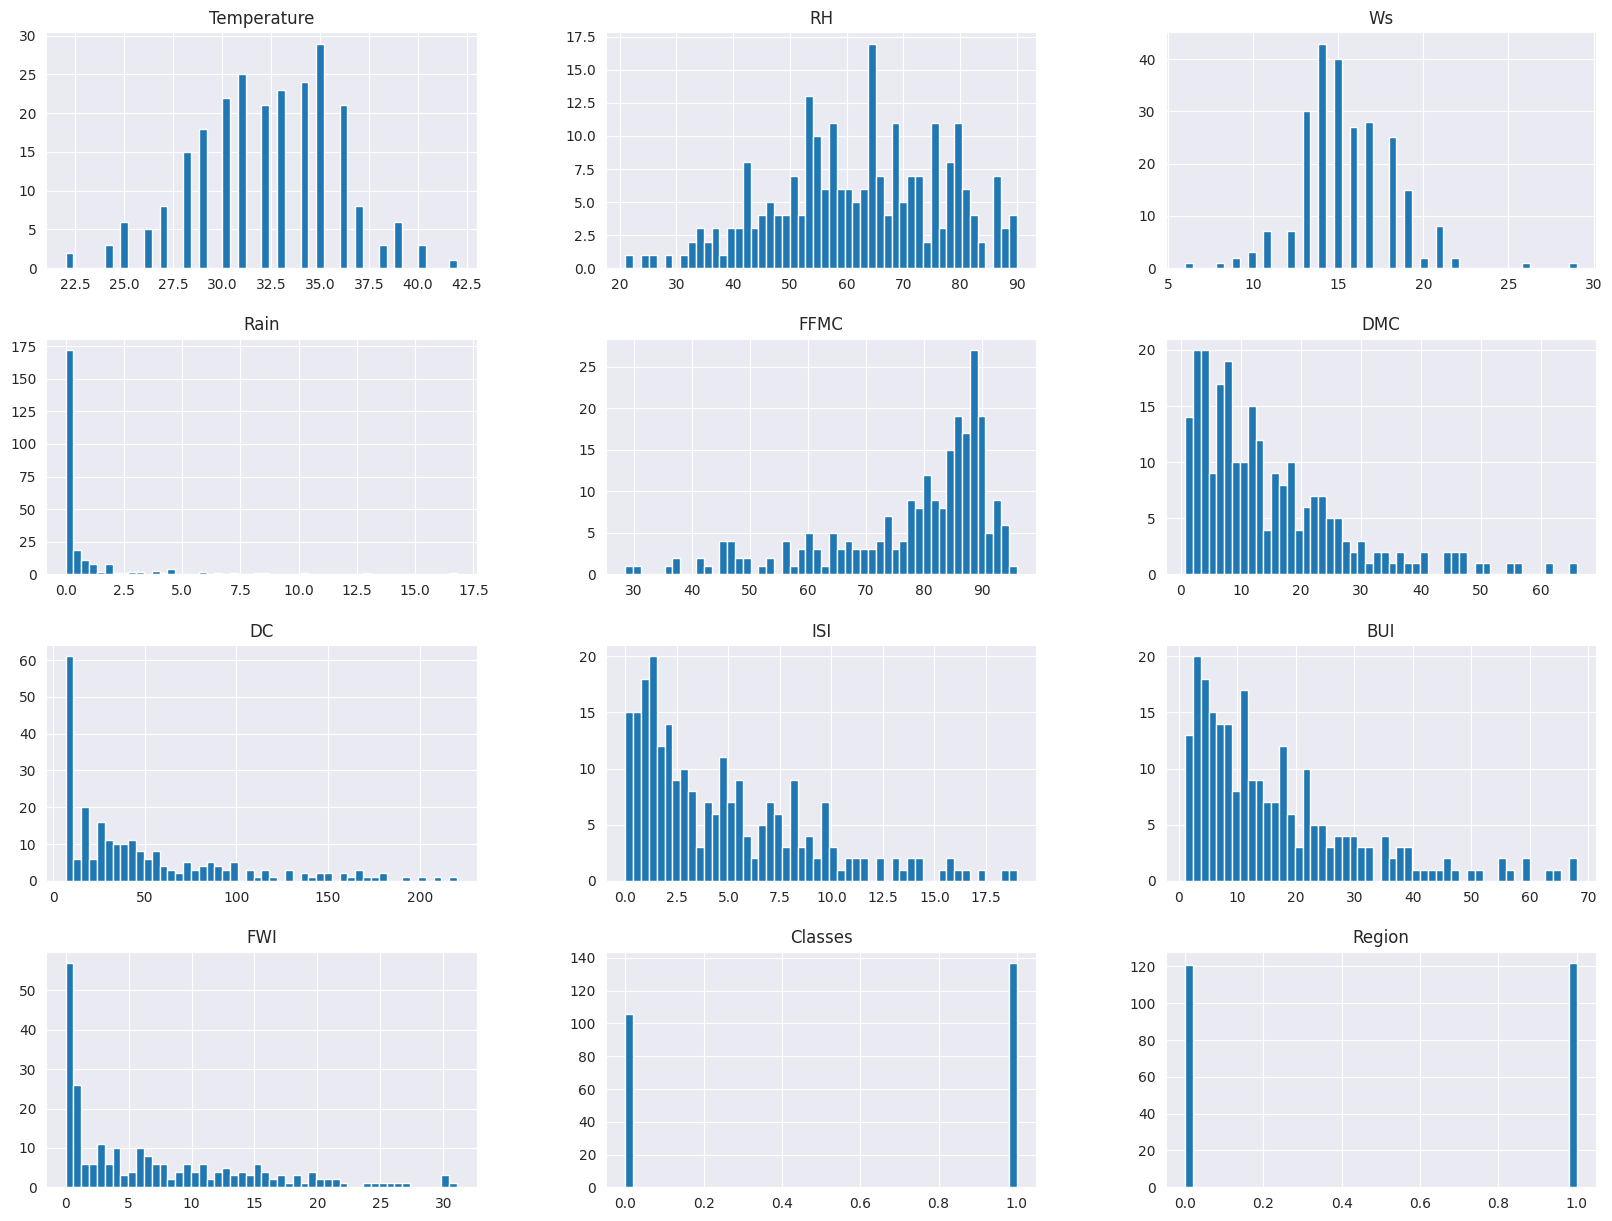

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')  # Set Seaborn style (e.g., 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks')
df_copy.hist(bins=50, figsize=(20, 15))
plt.show()


In [ ]:
# Percentage for pie chart
percentage = df_copy['Classes'].value_counts(normalize=True)*100

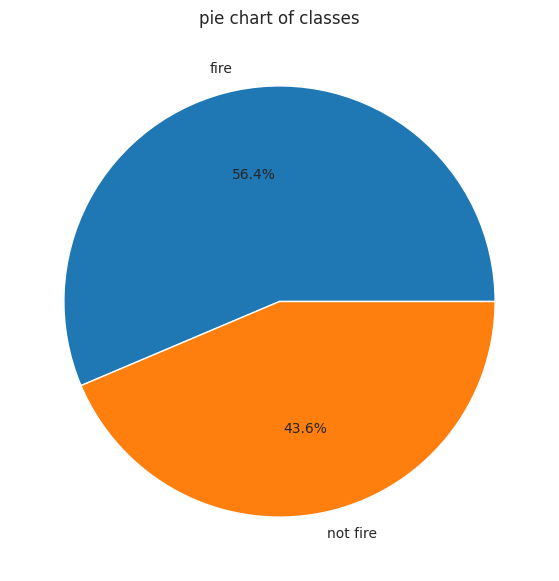

In [ ]:
# Plotting Pie chart
classlebels = ['fire', "not fire"]
plt.figure(figsize= (12,7))
plt.pie(percentage, labels=classlebels, autopct= '%1.1f%%')
plt.title("pie chart of classes")
plt.show()

# ***Correlation***

In [ ]:
df_copy.corr()

Temperature        RH        Ws      Rain      FFMC       DMC  \
Temperature     1.000000 -0.651400 -0.284510 -0.326492  0.676568  0.485687   
RH             -0.651400  1.000000  0.244048  0.222356 -0.644873 -0.408519   
Ws             -0.284510  0.244048  1.000000  0.171506 -0.166548 -0.000721   
Rain           -0.326492  0.222356  0.171506  1.000000 -0.543906 -0.288773   
FFMC            0.676568 -0.644873 -0.166548 -0.543906  1.000000  0.603608   
DMC             0.485687 -0.408519 -0.000721 -0.288773  0.603608  1.000000   
DC              0.376284 -0.226941  0.079135 -0.298023  0.507397  0.875925   
ISI             0.603871 -0.686667  0.008532 -0.347484  0.740007  0.680454   
BUI             0.459789 -0.353841  0.031438 -0.299852  0.592011  0.982248   
FWI             0.566670 -0.580957  0.032368 -0.324422  0.691132  0.875864   
Classes         0.516015 -0.432161 -0.069964 -0.379097  0.769492  0.585658   
Region         -0.269555  0.402682  0.181160  0.040013 -0.222241 -0.192089   

                   DC       ISI       BUI       FWI   Classes    Region  
Temperature  0.376284  0.603871  0.459789  0.566670  0.516015 -0.269555  
RH          -0.226941 -0.686667 -0.353841 -0.580957 -0.432161  0.402682  
Ws           0.079135  0.008532  0.031438  0.032368 -0.069964  0.181160  
Rain        -0.298023 -0.347484 -0.299852 -0.324422 -0.379097  0.040013  
FFMC         0.507397  0.740007  0.592011  0.691132  0.769492 -0.222241  
DMC          0.875925  0.680454  0.982248  0.875864  0.585658 -0.192089  
DC           1.000000  0.508643  0.941988  0.739521  0.511123  0.078734  
ISI          0.508643  1.000000  0.644093  0.922895  0.735197 -0.263197  
BUI          0.941988  0.644093  1.000000  0.857973  0.586639 -0.089408  
FWI          0.739521  0.922895  0.857973  1.000000  0.719216 -0.197102  
Classes      0.511123  0.735197  0.586639  0.719216  1.000000 -0.162347  
Region       0.078734 -0.263197 -0.089408 -0.197102 -0.162347  1.000000

<Axes: >

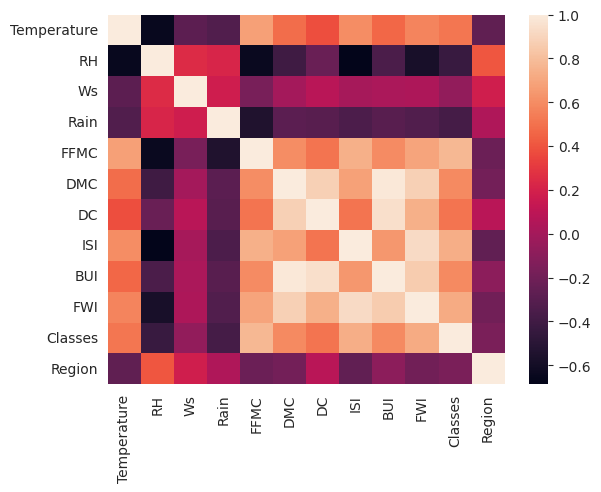

In [ ]:
sns.heatmap(df_copy.corr())

<Axes: ylabel='FWI'>

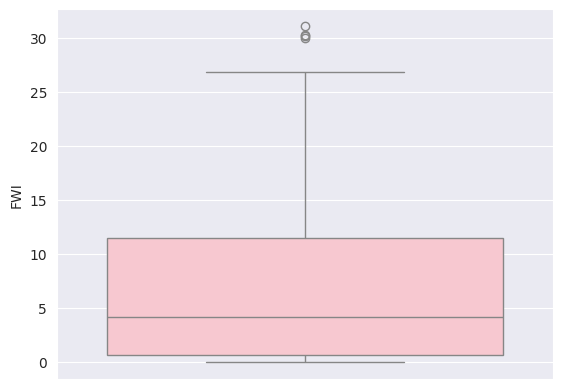

In [ ]:
# BOX plots
sns.boxplot(df_copy['FWI'], color= 'pink' )


In [ ]:
df['Classes']= np.where(df['Classes'].str.contains('not fire'), 'not fire', 'fire')

In [ ]:
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

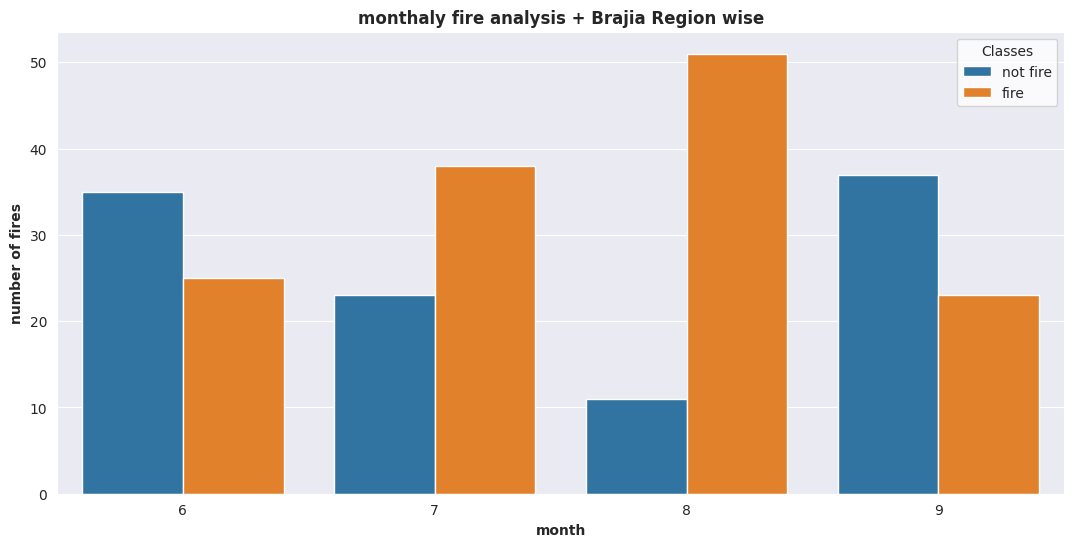

In [ ]:
# monthaly fire analysis +  Region wise
df_temp = df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x = 'month', hue= 'Classes', data= df)
plt.ylabel('number of fires', weight='bold')
plt.xlabel('month', weight='bold')
plt.title('monthaly fire analysis + Brajia Region wise', weight='bold')
plt.show()

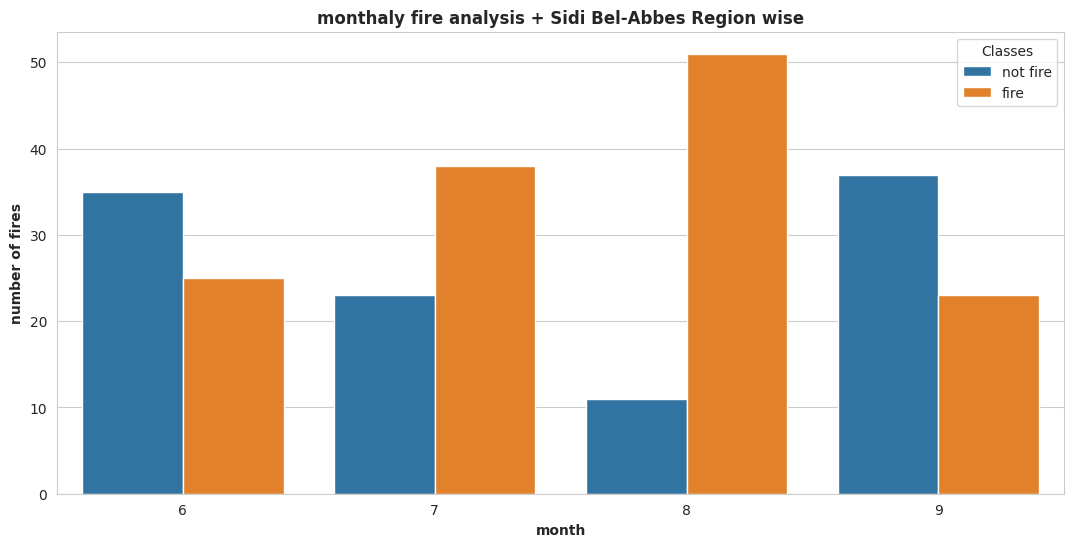

In [ ]:
# monthaly fire analysis +  Region wise
df_temp = df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x = 'month', hue= 'Classes', data= df)
plt.ylabel('number of fires', weight='bold')
plt.xlabel('month', weight='bold')
plt.title('monthaly fire analysis + Sidi Bel-Abbes Region wise', weight='bold')
plt.show()

It observed that August ans sept had the most number of forest fires for both regions, and from above plot of month we can understand it.
Most fires happened in August and it is upward trend upto august follo by june and july.

September had less fire events.

# ***model training***

In [ ]:
df_copy.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
df_copy['Classes'] = np.where(df['Classes'].astype(str).str.contains('not fire'), 0, 1)


In [ ]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [ ]:
df_copy.head()

Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  Classes  Region
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5        0     1.0
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4        0     1.0
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1        0     1.0
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0        0     1.0
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5        0     1.0

In [ ]:
## Independent(input) and Dependent(output) Features
X = df_copy.drop('FWI', axis =1)
y = df['FWI']

In [ ]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [ ]:
# Feature selecttion based on correlation coefficient

<Axes: >

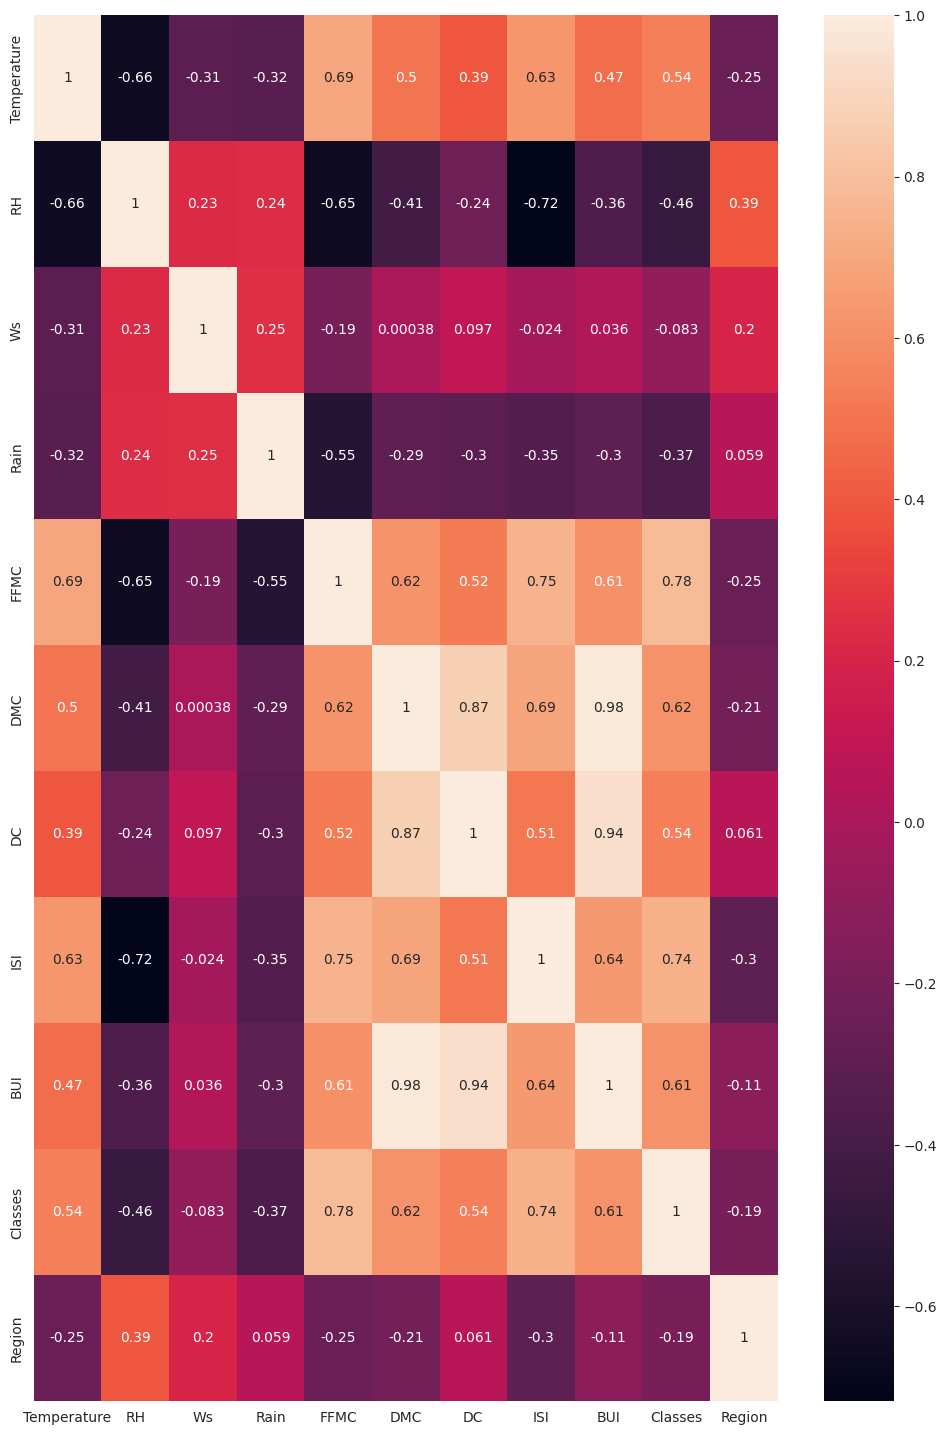

In [ ]:
# check for multi-collinearity
plt.figure(figsize = (12,18))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [ ]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range (len(corr_matrix.columns)):
    for j in range (i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
## Threshold is based on domain experties
correlation(X_train, 0.7)

{'BUI', 'Classes', 'DC', 'ISI'}

In [ ]:
corr_features = correlation(X_train, 0.85)
corr_features

{'BUI', 'DC'}

In [ ]:
# drop the features when correlation is greater than 0.85
X_train.drop(corr_features, axis = 1, inplace=True)
X_test.drop(corr_features, axis =1, inplace = True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

# ***Standardization or feature scaling***

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled, X_test_scaled

(array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
         -1.10431526,  0.98907071],
        [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
         -1.10431526, -1.01105006],
        [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
          0.90553851, -1.01105006],
        ...,
        [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
         -1.10431526,  0.98907071],
        [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
          0.90553851, -1.01105006],
        [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
         -1.10431526,  0.98907071]]),
 array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
         -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
          2.03772218e-01,  9.05538514e-01,  9.89070710e-01],
        [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
         -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
          3.65823283e-01,  9.05538514e-01,  9.89070710e-01],
        [-1

In [ ]:
## Box plot to understand effect of standard scaler

Text(0.5, 1.0, 'X_train after scaling')

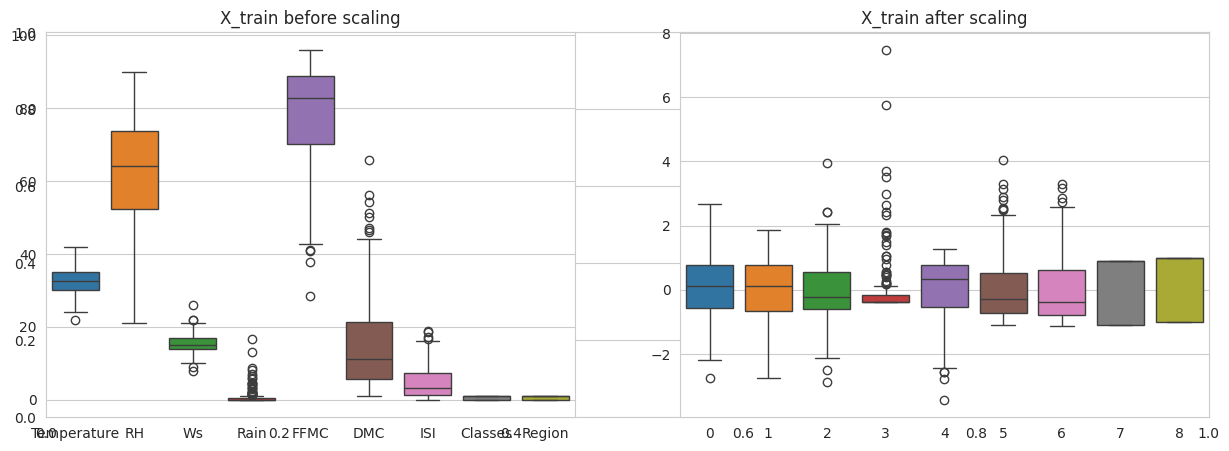

In [ ]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after scaling')


# ***Model Training***

# **`*`Linear Regression Model`*`**

Mean Absolute Error: 0.5468236465249986
Mean Squared Error: 0.6742766873791607
Root Mean Squared Error: 0.8211435242265268
R2 Score: 0.9847657384266951


Text(0.5, 1.0, 'Actual vs Predicted')

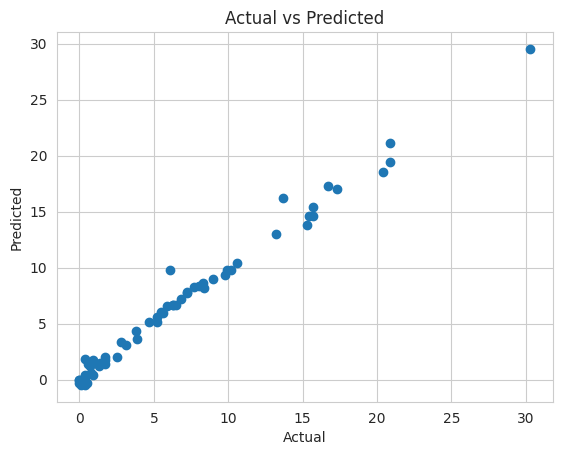

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

predicted = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, predicted)
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2 )

plt.scatter(y_test, predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')



# **Lasso Regression**

Mean Absolute Error: 1.133175994914409
Mean Squared Error: 2.2483458918974772
Root Mean Squared Error: 1.4994485292591664
R2 Score: 0.9492020263112388


Text(0.5, 1.0, 'Actual vs Predicted')

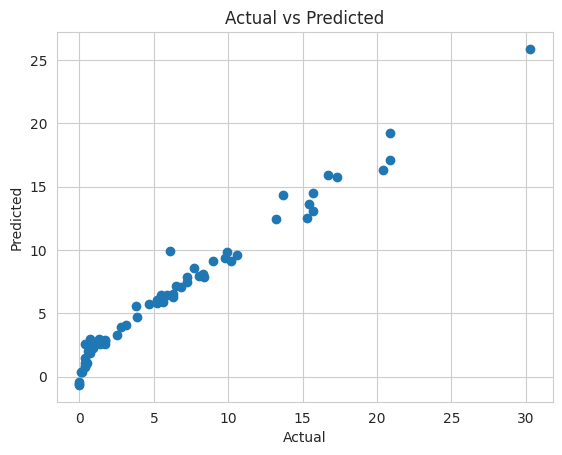

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

predicted = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, predicted)
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2 )

plt.scatter(y_test, predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [ ]:
### HYPERPARAMETER TUNNING
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5, random_state=0)     ## k-fold cross validation (k =5)
lassocv.fit(X_train_scaled, y_train)


LassoCV(cv=5, random_state=0)

In [ ]:
# alpha value selected by model
lassocv.alpha_

0.05725391318234408

In [ ]:
lassocv.predict(X_test_scaled)

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

In [ ]:
# check different Alpha values tried by model
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [ ]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

Mean Absolute Error: 0.619970115826343
Mean Squared Error: 0.792499555474362
Root Mean Squared Error: 0.8902244410677355
R2 Score: 0.9820946715928275


Text(0.5, 1.0, 'Actual vs Predicted')

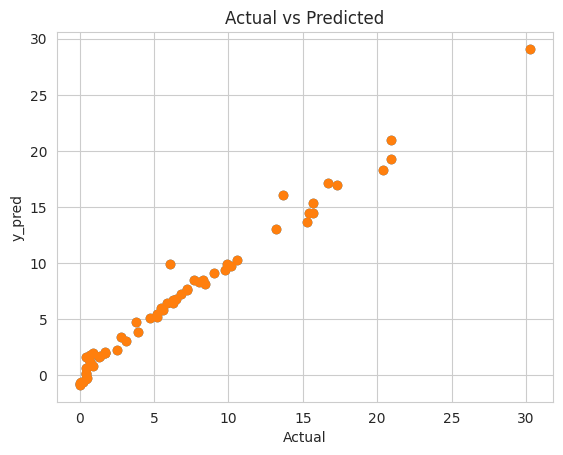

In [ ]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)



mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2 )

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('y_pred')
plt.title('Actual vs Predicted')

# **Ridge Regression**

Mean Absolute Error: 0.5642305340105692
Mean Squared Error: 0.6949198918152074
Root Mean Squared Error: 0.8336185529456548
R2 Score: 0.9842993364555513


Text(0.5, 1.0, 'Actual vs Predicted')

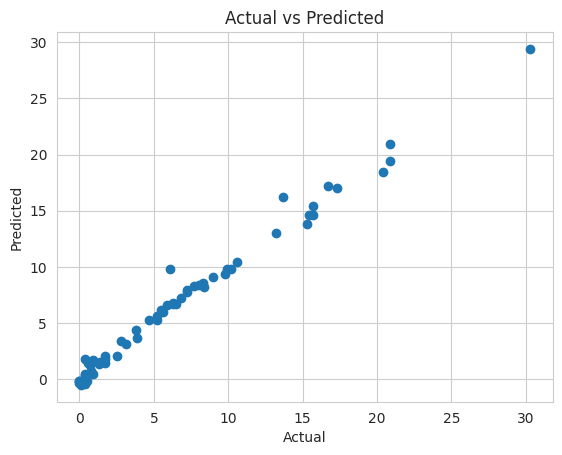

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

predicted = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, predicted)
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2 )

plt.scatter(y_test, predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

Mean Absolute Error: 0.5642305340105692
Mean Squared Error: 0.6949198918152074
Root Mean Squared Error: 0.8336185529456548
R2 Score: 0.9842993364555513


Text(0.5, 1.0, 'Actual vs Predicted')

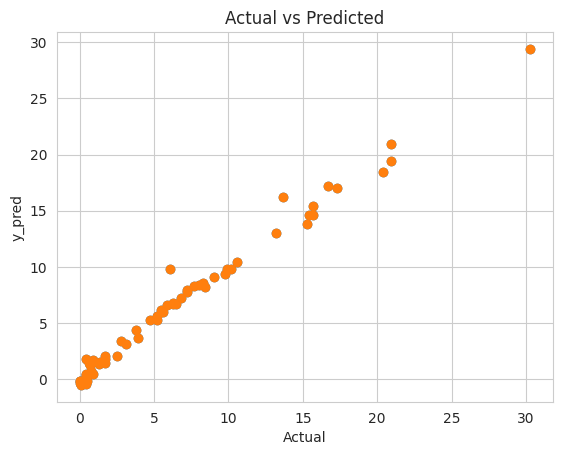

In [ ]:
## Hyperparameter tunning
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)



y_pred = ridgecv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)



mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2 )

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('y_pred')
plt.title('Actual vs Predicted')

In [ ]:
ridgecv.alpha_


1.0

In [ ]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [ ]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

# **Elasticnet Regression**

Mean Absolute Error: 1.8822353634896005
Mean Squared Error: 5.5172511010252245
Root Mean Squared Error: 2.3488829474933874
R2 Score: 0.8753460589519703


Text(0.5, 1.0, 'Actual vs Predicted')

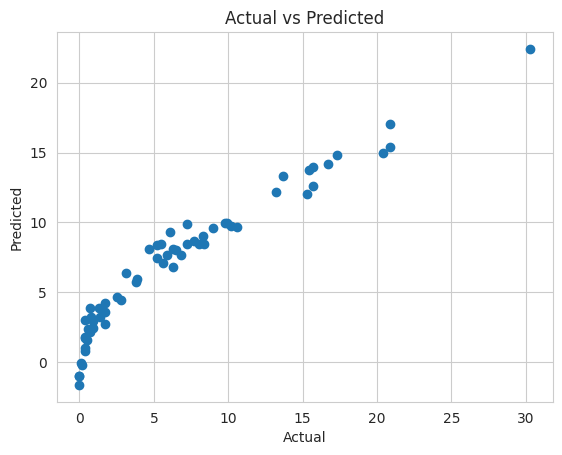

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
enet = ElasticNet()
enet.fit(X_train_scaled, y_train)

predicted = enet.predict(X_test_scaled)
mae = mean_absolute_error(y_test, predicted)
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2 )

plt.scatter(y_test, predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

Mean Absolute Error: 0.6575946731430898
Mean Squared Error: 0.8222830416276258
Root Mean Squared Error: 0.906798236449336
R2 Score: 0.9814217587854941


Text(0.5, 1.0, 'Actual vs Predicted')

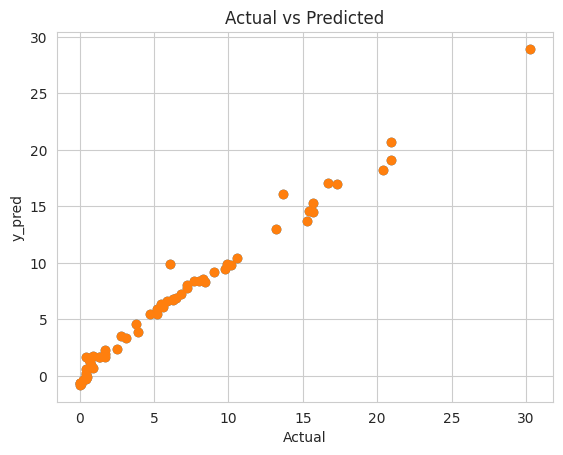

In [ ]:
## Hyperparameter tunning
from sklearn.linear_model import ElasticNetCV
encv = ElasticNetCV(cv=5)
encv.fit(X_train_scaled, y_train)



y_pred = encv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)



mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2 )

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('y_pred')
plt.title('Actual vs Predicted')

In [ ]:
encv.alpha_

0.04311146156383891

In [ ]:
encv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

In [ ]:
# pickle the Mchine Learning models, preprocessing models and standardizTION FOR FUTURE DEPLOYMENT
# as we know by above results Ridge model is giving good results so we are going to save it
# for prepocessing and standardization we have to save 'scaler' model

import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))

In [ ]:
import pickle

# Save the trained model
with open('ridge_model.pkl', 'wb') as file:
    pickle.dump(ridgecv, file)

# Save the StandardScaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)


In [ ]:
from flask import Flask, request, jsonify, render_template
import numpy as np
import pickle

app = Flask(__name__)

# Load the trained Ridge model and scaler
with open('ridge_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Define the home route
@app.route('/')
def home():
    return render_template('index.html')

# Define the prediction route
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get data from form
        data = [float(x) for x in request.form.values()]

        # Convert data to numpy array and reshape
        input_data = np.array(data).reshape(1, -1)

        # Scale the input data
        input_data_scaled = scaler.transform(input_data)

        # Predict the FWI
        prediction = model.predict(input_data_scaled)

        # Return the prediction result
        return render_template('index.html', prediction_text='Predicted FWI: {:.2f}'.format(prediction[0]))

    except Exception as e:
        return jsonify({"error": str(e)})

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


# ***XAI***

In [ ]:
pip install shap


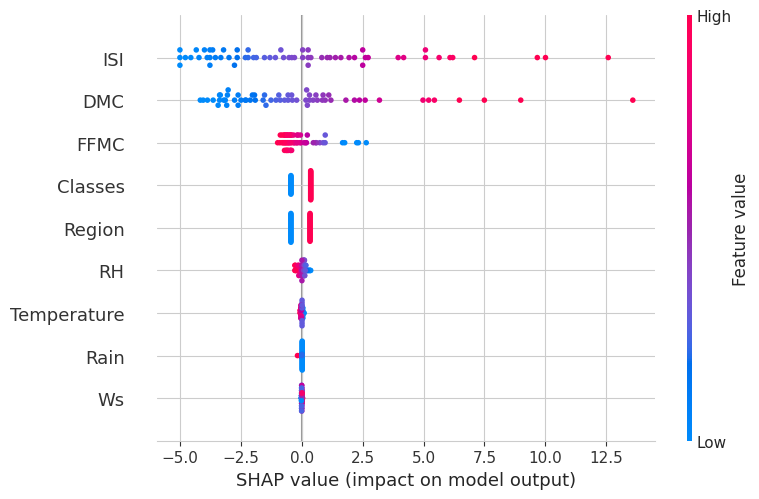

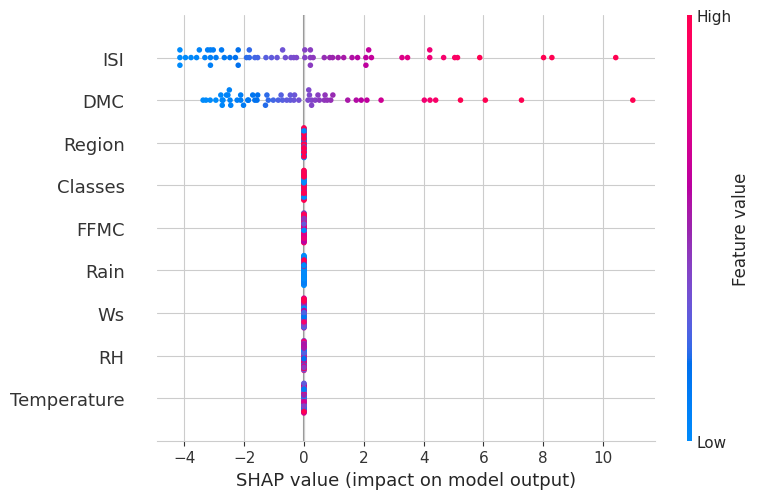

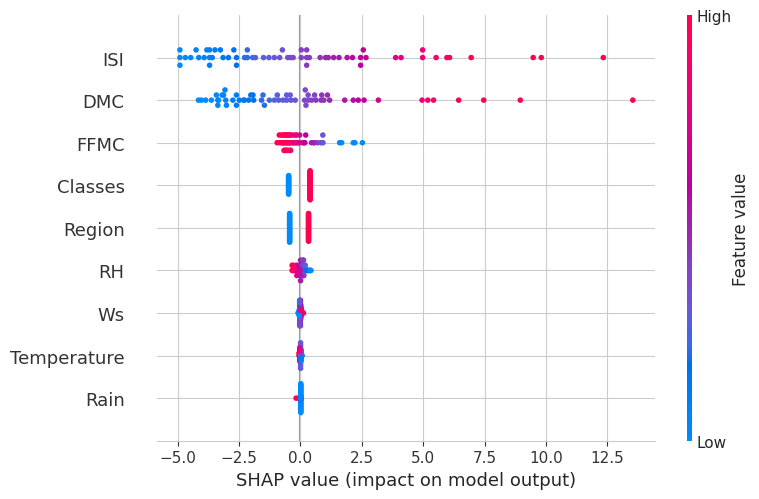

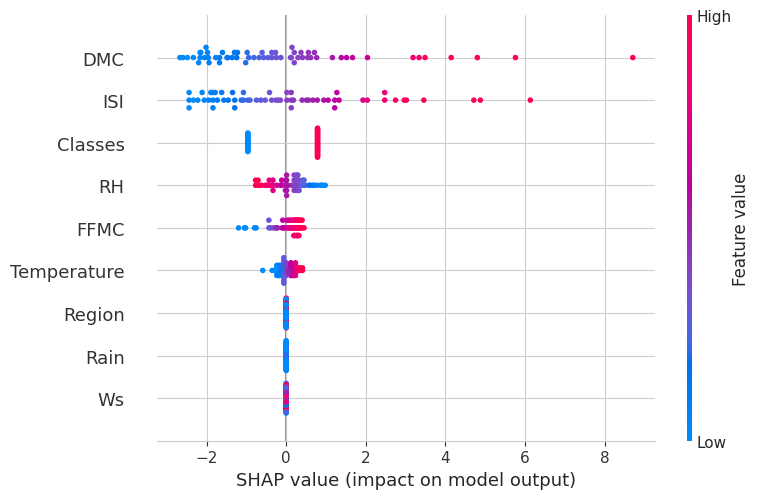

In [ ]:
import shap
import matplotlib.pyplot as plt

# Initialize the SHAP explainer for each model
# For Linear Regression
explainer_linreg = shap.Explainer(linreg, X_train_scaled)
shap_values_linreg = explainer_linreg(X_test_scaled)

# For Lasso Regression
explainer_lasso = shap.Explainer(lasso, X_train_scaled)
shap_values_lasso = explainer_lasso(X_test_scaled)

# For Ridge Regression
explainer_ridge = shap.Explainer(ridge, X_train_scaled)
shap_values_ridge = explainer_ridge(X_test_scaled)

# For ElasticNet
explainer_enet = shap.Explainer(enet, X_train_scaled)
shap_values_enet = explainer_enet(X_test_scaled)

# Plot summary plot for each model
shap.summary_plot(shap_values_linreg, X_test_scaled, feature_names=X_train.columns)
shap.summary_plot(shap_values_lasso, X_test_scaled, feature_names=X_train.columns)
shap.summary_plot(shap_values_ridge, X_test_scaled, feature_names=X_train.columns)
shap.summary_plot(shap_values_enet, X_test_scaled, feature_names=X_train.columns)


In [ ]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=c984fdd31ef02b9eaf1d67774b075dfa7c6a7cd514f01b5040857bfb4b26a1b2
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime import lime_tabular

# Create a LIME explainer
explainer = lime_tabular.LimeTabularExplainer(X_train_scaled, feature_names=X_train.columns, class_names=['FWI'], mode='regression')

# Explain individual predictions for each model
i = 0  # Index of the test sample you want to explain

# For Linear Regression
exp_linreg = explainer.explain_instance(X_test_scaled[i], linreg.predict)
exp_linreg.show_in_notebook()

# For Lasso Regression
exp_lasso = explainer.explain_instance(X_test_scaled[i], lasso.predict)
exp_lasso.show_in_notebook()

# For Ridge Regression
exp_ridge = explainer.explain_instance(X_test_scaled[i], ridge.predict)
exp_ridge.show_in_notebook()

# For ElasticNet
exp_enet = explainer.explain_instance(X_test_scaled[i], enet.predict)
exp_enet.show_in_notebook()
